# Data Mining - I

### Prepared By:

- Kushal Gupta
- Student Number: M13969435
- Email: guptaks@mail.uc.edu
- MS in Business Analytics Student

### Prepared For:

- Yan Yu, PhD
- Joseph S. Stern Professor of Business Analytics,
- Department of Operations, Business Analytics, and Information Systems
- Carl H. Lindner College of Business
- Univerity Of Cincinnati



## Assignment - 1 (1.A Lab Replicate)

#### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns = data.feature_names)  #create a dataframe named iris
iris['species'] = data.target 
iris.replace({'species': {0: 'setosa', 1: 'versicolor', 2 : 'virginica'}}, inplace = True)  # assign species names to numeric values in iris dataframe 


#### Dataset Details

In [2]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.shape

(150, 5)

In [5]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [6]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Creating subsets for the 3 species
setosa = iris[iris['species'] == "setosa"]
versicolor = iris[iris['species'] == "versicolor"]
virginica = iris[iris['species'] == "virginica"]

## Classification Analysis (Supervised Learning)

### K - Nearest Neighbour (KNN)

#### Creating training and test datasets for model creation (70:30 split and seed = student M number )

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns = data.feature_names)
target = data.target
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size = 0.3, random_state = 13969435)

#### Training of the model

In [9]:
# Training of the model for 5 nearest neighbours
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)


KNeighborsClassifier()

#### Model Prediction

In [10]:
model1.predict(X_train)


array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0,
       0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2,
       0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2])

#### Model Accuracy

In [11]:
(model1.predict(X_train) != y_train).sum()

1

In [12]:
y_pred = model1.predict(X_test)
data = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
confusion_matrix = pd.crosstab(data['Actual'], data['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0   1   2
Actual               
0          11   0   0
1           0  17   1
2           0   1  15


In [13]:
(y_pred != y_test).sum()

2

## Clustering Analysis (Unsupervised Learning)

### K-Means Clustering (5 clusters)


In [14]:
from sklearn.cluster import KMeans

In [15]:
model2 = KMeans(n_clusters=5, random_state = 13969435)
model2.fit(iris)

KMeans(n_clusters=5, random_state=13969435)

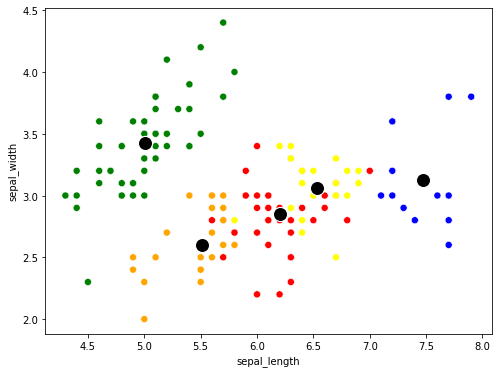

In [16]:
kmeans = iris.copy()
kmeans_df = pd.DataFrame(kmeans)
kmeans_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
kmeans_df['species'] = model2.predict(iris)

plt.figure(figsize = (8,6))
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', palette = ['orange','green','blue', 'red', 'yellow'], s = 50, data = kmeans_df)
sns.scatterplot(x = model2.cluster_centers_[:,0], y = model2.cluster_centers_[:,1], s = 200, color = 'black')
plt.legend().set_visible(False)
plt.show()

### K-Means Clustering (3 clusters)

In [17]:
model3 = KMeans(n_clusters=3, random_state = 13969435)
model3.fit(iris)


KMeans(n_clusters=3, random_state=13969435)

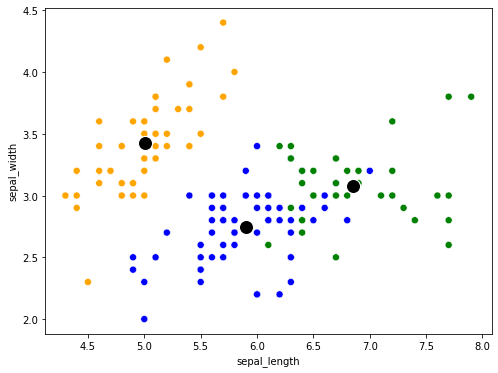

In [18]:
kmeans = iris.copy()
kmeans_df = pd.DataFrame(kmeans)
kmeans_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
kmeans_df['species'] = model3.predict(iris)

plt.figure(figsize = (8,6))
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', palette = ['orange','green','blue'], s = 50, data = kmeans_df)
sns.scatterplot(x = model3.cluster_centers_[:,0], y = model3.cluster_centers_[:,1], s = 200, color = 'black')
plt.legend().set_visible(False)
plt.show()

## Hierarchical clustering

### Dendrogram

In [19]:
import scipy.cluster.hierarchy as sch

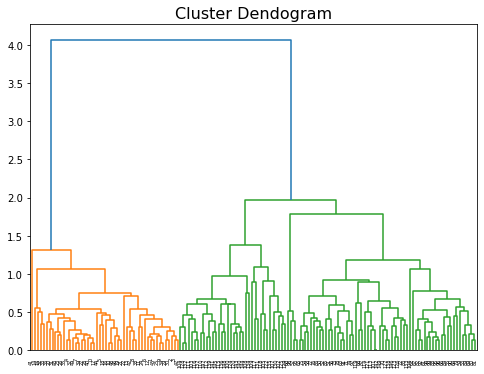

In [20]:
plt.figure(figsize = (8,6))
dendrogram = sch.dendrogram(sch.linkage(iris, method='average'))
plt.title('Cluster Dendogram', fontsize = 16)
plt.show()

#### Model Fitting

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
model4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model4.fit(iris)

AgglomerativeClustering(linkage='average', n_clusters=3)

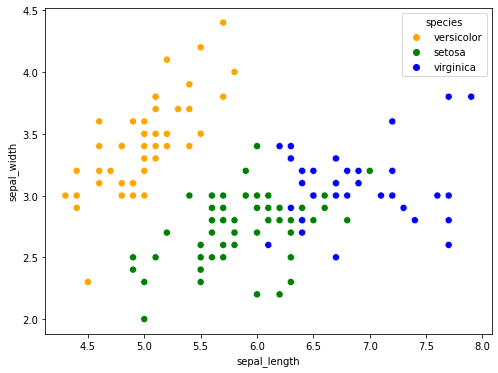

In [23]:
clustering = iris.copy()
clustering_df = pd.DataFrame(clustering)
clustering_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
clustering_df['species'] = model4.labels_
clustering_df.replace({'species': {0: 'setosa', 1: 'versicolor', 2 : 'virginica'}}, inplace = True)

plt.figure(figsize = (8,6))
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', palette = ['orange','green','blue'], s = 50, data = clustering_df)
plt.show()

## Assignment - 1 (1.B Lab Replicate)

#### Calculator

In [24]:
x = 10
y = 5
x+y

15

In [25]:
# Log function

import math
print(math.log(x))


2.302585092994046


In [26]:
# Exponential function

print(math.exp(y))


148.4131591025766


In [27]:
# Cos function

print(math.cos(x))

-0.8390715290764524


In [28]:
# Logical
x == y

False

In [29]:
x > y

True

#### Vector Manipulation

In [30]:
# Define numerical vector z

import numpy as np
list1 = [3,5,7,9]
list2 = ["cup", "plate", "pen", "paper"]
z = np.array(list1)
zz = np.array(list2)

print(z)
print(zz)

[3 5 7 9]
['cup' 'plate' 'pen' 'paper']


In [31]:
# Mean
np.average(z)

6.0

In [32]:
# Standard Deviation

np.std(z)

2.23606797749979

In [33]:
# Median

np.median(z)

6.0

In [34]:
# Maximum

np.max(z)

9

In [35]:
# Minimum

np.min(z)

3


#### Element wise calculations:

In [36]:
# Sum:

z1 = z+2
print(z1)

[ 5  7  9 11]


In [37]:
# Division:

z2 = z/10
print(z2)

[0.3 0.5 0.7 0.9]


In [38]:
# Array Addition
z3 = np.array([2,4,6,8])
# Elementwise operations (must be the same length)
print(z+z3)

[ 5  9 13 17]


In [39]:
# Array Multiplication

print(z*z3)

[ 6 20 42 72]


In [40]:
z4 = np.append(z, z3)
print(z4)

[3 5 7 9 2 4 6 8]


#### Indexing

In [41]:
# Second element pull from z4

print(z4[1])

5


In [42]:
# All elements greater than 3

print(z4[z4>3])

[5 7 9 4 6 8]


In [43]:
# All elements greater than 3 and less than 6

print(z4[(z4>3) & (z4<6)])

[5 4]


In [44]:
# All elements sorted in ascending 

print(np.sort(z4))

[2 3 4 5 6 7 8 9]


#### In Lab Replicate Excercises:


In [45]:
# Dot product

print(np.dot(z, z3))

140


In [46]:

print(z4[ (z4<3) | (z4>7)])

[9 2 8]


#### Matrix Manipulation

In [47]:
# Creation of Matrix

z = np.array([1,2,3,4,5,6])
A = np.array(z).reshape(2,3)
print(A)

[[1 2 3]
 [4 5 6]]


In [48]:
# Element Wise addition in Matrix

print(A+2)

[[3 4 5]
 [6 7 8]]


In [49]:
print("Matrix Dimensions:" + str(len(A)) + "X" + str(len(A[0])))

Matrix Dimensions:2X3


In [50]:
# Transpose

AT = A.transpose()
print(AT)

[[1 4]
 [2 5]
 [3 6]]


In [51]:
# Matrix Multiplication
AMUL = np.matmul(A, AT) 
print(AMUL)


[[14 32]
 [32 77]]


In [52]:
# DataFrames

storks_csv = pd.read_csv('storks.csv')
storks_txt = pd.read_csv('storks.txt', delimiter = "\t")

storks_csv.head()

,Country,Area,Storks,Humans,Birth rate
0,Albania,28750,100,3.2,83
1,Austria,83860,300,7.6,87
2,Belgium,30520,1,9.9,118
3,Bulgaria,111000,5000,9.0,117
4,Denmark,43100,9,5.1,59


In [53]:
storks_txt.head()

,Country,Area,Storks,Humans,Birth rate
0,Albania,28750,100,3.2,83
1,Austria,83860,300,7.6,87
2,Belgium,30520,1,9.9,118
3,Bulgaria,111000,5000,9.0,117
4,Denmark,43100,9,5.1,59


In [54]:
# Load boston dataset

data = datasets.load_boston()
boston = pd.DataFrame(data.data, columns = data.feature_names)  #create a dataframe named boston
boston['MEDV'] = data.target 
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
mylist = list([z3, A, boston])

In [56]:
#fit a simple linear regression 
from sklearn.linear_model import LinearRegression
X = boston[['LSTAT','B','CRIM', 'ZN','INDUS','CHAS','NOX','RM', 'AGE','DIS','RAD','TAX','PTRATIO']]
y = boston['MEDV']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13969435)

In [58]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
LSTAT,-0.571338
B,0.009919
CRIM,-0.071360
ZN,0.055949
INDUS,-0.001425
CHAS,2.563920
NOX,-19.005005
RM,3.244346
AGE,-0.005214
DIS,-1.656452


## Assignment - 1 (1.B Lab Excercise)


In [60]:
# Ques1: Economic Order Quantity Model: Q=2DK/h‾‾‾‾‾‾√

# D=5000: annual demand quantity
# K=$4: fixed cost per order
# h=$0.5: holding cost per unit
# Q=?

import math 

D = 5000
K = 4
h = 0.5
Q = math.sqrt(2*D*K/h)
print(Q)

282.842712474619


In [61]:
# Ques2: Define a vector with values (5, 2, 11, 19, 3, -9, 8, 20, 1). 
# Calculate the sum, mean, and standard deviation.
# Re-order the vector from largest to smallest, and make it a new vector.
# Convert the vector to a 3*3 matrix ordered by column. What is the sum of first column? 
# What is the number in column 2 row 3? What is the column sum?


import numpy as np
list1 = [5, 2, 11, 19, 3, -9, 8, 20, 1]
vector1 = np.array(list1)

In [62]:
print(vector1)

[ 5  2 11 19  3 -9  8 20  1]


In [63]:
# Sum
np.sum(vector1)

60

In [64]:
# Mean
np.average(vector1)

6.666666666666667

In [65]:
# Variance
np.var(vector1)

74.0

In [66]:
# Standard Deviation
np.std(vector1)

8.602325267042627

In [67]:
vector2 = np.sort(vector1)
print(vector2)

[-9  1  2  3  5  8 11 19 20]


In [68]:
# Convert vector to matrix (3X3)
arr_2d = np.reshape(vector2, (3, 3))
print(arr_2d)

[[-9  1  2]
 [ 3  5  8]
 [11 19 20]]


In [69]:
# Sum of all columns
print(arr_2d.sum(axis=0))

[ 5 25 30]


##### The sum of first column is 5
##### Number '19' lies in column 2 and Row 3
##### The column sum is (5,25,30)

In [70]:
import pandas as pd
customer = pd.read_csv("CustomerData.csv")

In [71]:
# Sample data

customer.head()

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1,2,Female,20,15,Professional,Yes,0,No,...,Yes,Yes,Yes,No,13,No,Yes,Yes,No,No
1,0648-AIPJSP-UVM,5,5,Male,22,17,Sales,No,0,No,...,No,Yes,No,Yes,18,Yes,Yes,Yes,Yes,Yes
2,5195-TLUDJE-HVO,3,4,Female,67,14,Sales,No,16,No,...,No,No,No,No,21,No,No,No,No,Yes
3,4459-VLPQUH-3OL,4,3,Male,23,16,Sales,No,0,No,...,No,No,No,Yes,26,Yes,Yes,Yes,No,Yes
4,8158-SMTQFB-CNO,2,2,Male,26,16,Sales,No,1,No,...,Yes,Yes,Yes,No,27,Yes,No,Yes,No,No


In [72]:
# Dataset information

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           5000 non-null   object 
 1   Region               5000 non-null   int64  
 2   TownSize             5000 non-null   object 
 3   Gender               4967 non-null   object 
 4   Age                  5000 non-null   int64  
 5   EducationYears       5000 non-null   int64  
 6   JobCategory          4985 non-null   object 
 7   UnionMember          5000 non-null   object 
 8   EmploymentLength     5000 non-null   int64  
 9   Retired              5000 non-null   object 
 10  HHIncome             5000 non-null   float64
 11  DebtToIncomeRatio    5000 non-null   float64
 12  CreditDebt           5000 non-null   float64
 13  OtherDebt            5000 non-null   float64
 14  LoanDefault          5000 non-null   object 
 15  MaritalStatus        5000 non-null   o

In [73]:
# Column Names 

customer["DebtToIncomeRatio"].mean()

9.954160000000028

In [74]:
# Proportion of married customers

print((customer['MaritalStatus'].value_counts()['Married']) / 
      (customer['MaritalStatus'].value_counts()['Unmarried'] + customer['MaritalStatus'].value_counts()['Married']))
      

0.4802


##### We see ~48% married customers in the dataset

## Assignment - 1 (Lab 1.C Replicate)
#### Functions: 

Function returning absolute value

In [75]:
def absolute(x):
  if(x>=0):
    return(x)
  else:
    return(-x)

# Function call

absolute(-5)

5

In [76]:
absolute(15)

15

In [77]:
absolute(0)

0

Function performing vector truncation

In [78]:
def mytruncation(v,lower,upper):
    v[(v < lower)] = lower
    v[(v > upper)] = upper
    return(v)

In [79]:
list1 = np.array(range(1, 10))
mytruncation(v = list1, lower = 3, upper = 7)

array([3, 3, 3, 4, 5, 6, 7, 7, 7])

##### Loops:

While Loop

In [80]:
i = 1
x = 1
while (i < 100):
  i = i+1;
  x = x+1/i;
    
print(x)    

5.187377517639621


For Loop

In [81]:
x = 1
for i in range(2, 101):
  x = x+1/i
print(x)

5.187377517639621


## Assignment - 1 (Lab 1.C Excercise)

In [82]:
# Sequence generation and finding the sum of the sequence with input number of variables:

def Series(n):
    sums = 0.0
    for i in range(1, n + 1):
        ser = 1 / (i**i)
        sums += ser
    return sums
  
# Driver Code
n = 13
res = round(Series(n), 5)
print(res)

1.29129


##### From the above analysis, it is clear that the series is a converging one as the value does not change for higher values of n

In [83]:
# Fibonacci Series

# Program to display the Fibonacci sequence up to 50th term

nterms = 50

# first two terms
n1, n2 = 0, 1
count = 0

# check if the number of terms is valid
print("Fibonacci sequence:")
while count < nterms:
    print(n1)
    nth = n1 + n2
    # update values
    n1 = n2
    n2 = nth
    count += 1

Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229
832040
1346269
2178309
3524578
5702887
9227465
14930352
24157817
39088169
63245986
102334155
165580141
267914296
433494437
701408733
1134903170
1836311903
2971215073
4807526976
7778742049


The next number after 13 is 21

The 50th number in the sequence is 7778742049


In [84]:
# Fibonacci Series array of first 30 numbers

# Program to display the Fibonacci sequence up to 50th term
nterms = 30
# first two terms
n1, n2 = 0, 1
count = 0
arr = np.array([]).astype(int)
print("Fibonacci sequence:")
while count < nterms:
    print(n1)
    arr = np.append(arr, n1) 
    nth = n1 + n2  
    # update values
    n1 = n2
    n2 = nth
    count += 1

print(arr)

Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229
[     0      1      1      2      3      5      8     13     21     34
     55     89    144    233    377    610    987   1597   2584   4181
   6765  10946  17711  28657  46368  75025 121393 196418 317811 514229]
